<a href="https://colab.research.google.com/github/Samiksha2514/Machine-Learning-Models/blob/main/Model.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

Importing the necessary libraries

In [ ]:
#For importing data
import pandas as pd
import numpy as np

#For visualizing the data
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn import tree

#For preparing the data
from sklearn.preprocessing import StandardScaler
from sklearn.preprocessing import LabelEncoder
from sklearn.preprocessing import KBinsDiscretizer
scaler = StandardScaler()
le = LabelEncoder()

#For Logistic Regression
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import accuracy_score
from sklearn.metrics import classification_report
from sklearn.metrics import confusion_matrix
from sklearn import metrics

#For KNN
from sklearn.neighbors import KNeighborsClassifier

#For SVVM
from sklearn.svm import SVC

#For Decision Tree
from sklearn.tree import DecisionTreeClassifier

In [ ]:
#Loading the dataset
data = pd.read_csv('Dataset - HR Employee Attrition.csv')

In [ ]:
#Display first 5 rows of data
data.head()

,EmployeeNumber,Attrition,Age,BusinessTravel,DailyRate,Department,DistanceFromHome,Education,EducationField,EmployeeCount,...,RelationshipSatisfaction,StandardHours,StockOptionLevel,TotalWorkingYears,TrainingTimesLastYear,WorkLifeBalance,YearsAtCompany,YearsInCurrentRole,YearsSinceLastPromotion,YearsWithCurrManager
0,1,Yes,41,Travel_Rarely,1102,Sales,1,2,Life Sciences,1,...,1,80,0,8,0,1,6,4,0,5
1,2,No,49,Travel_Frequently,279,Research & Development,8,1,Life Sciences,1,...,4,80,1,10,3,3,10,7,1,7
2,3,Yes,37,Travel_Rarely,1373,Research & Development,2,2,Other,1,...,2,80,0,7,3,3,0,0,0,0
3,4,No,33,Travel_Frequently,1392,Research & Development,3,4,Life Sciences,1,...,3,80,0,8,3,3,8,7,3,0
4,5,No,27,Travel_Rarely,591,Research & Development,2,1,Medical,1,...,4,80,1,6,3,3,2,2,2,2


In [ ]:
#Checking for missing values
data.isna().sum()

EmployeeNumber              0
Attrition                   0
Age                         0
BusinessTravel              0
DailyRate                   0
Department                  0
DistanceFromHome            0
Education                   0
EducationField              0
EmployeeCount               0
EnvironmentSatisfaction     0
Gender                      0
HourlyRate                  0
JobInvolvement              0
JobLevel                    0
JobRole                     0
JobSatisfaction             0
MaritalStatus               0
MonthlyIncome               0
MonthlyRate                 0
NumCompaniesWorked          0
Over18                      0
OverTime                    0
PercentSalaryHike           0
PerformanceRating           0
RelationshipSatisfaction    0
StandardHours               0
StockOptionLevel            0
TotalWorkingYears           0
TrainingTimesLastYear       0
WorkLifeBalance             0
YearsAtCompany              0
YearsInCurrentRole          0
YearsSince

In [ ]:
#Displaying the statistical summary of data
data.describe()

,EmployeeNumber,Age,DailyRate,DistanceFromHome,Education,EmployeeCount,EnvironmentSatisfaction,HourlyRate,JobInvolvement,JobLevel,...,RelationshipSatisfaction,StandardHours,StockOptionLevel,TotalWorkingYears,TrainingTimesLastYear,WorkLifeBalance,YearsAtCompany,YearsInCurrentRole,YearsSinceLastPromotion,YearsWithCurrManager
count,2940.000000,2940.000000,2940.000000,2940.000000,2940.000000,2940.0,2940.000000,2940.000000,2940.000000,2940.000000,...,2940.000000,2940.0,2940.000000,2940.000000,2940.000000,2940.000000,2940.000000,2940.000000,2940.000000,2940.000000
mean,1470.500000,36.923810,802.485714,9.192517,2.912925,1.0,2.721769,65.891156,2.729932,2.063946,...,2.712245,80.0,0.793878,11.279592,2.799320,2.761224,7.008163,4.229252,2.187755,4.123129
std,848.849221,9.133819,403.440447,8.105485,1.023991,0.0,1.092896,20.325969,0.711440,1.106752,...,1.081025,0.0,0.851932,7.779458,1.289051,0.706356,6.125483,3.622521,3.221882,3.567529
min,1.000000,18.000000,102.000000,1.000000,1.000000,1.0,1.000000,30.000000,1.000000,1.000000,...,1.000000,80.0,0.000000,0.000000,0.000000,1.000000,0.000000,0.000000,0.000000,0.000000
25%,735.750000,30.000000,465.000000,2.000000,2.000000,1.0,2.000000,48.000000,2.000000,1.000000,...,2.000000,80.0,0.000000,6.000000,2.000000,2.000000,3.000000,2.000000,0.000000,2.000000
50%,1470.500000,36.000000,802.000000,7.000000,3.000000,1.0,3.000000,66.000000,3.000000,2.000000,...,3.000000,80.0,1.000000,10.000000,3.000000,3.000000,5.000000,3.000000,1.000000,3.000000
75%,2205.250000,43.000000,1157.000000,14.000000,4.000000,1.0,4.000000,84.000000,3.000000,3.000000,...,4.000000,80.0,1.000000,15.000000,3.000000,3.000000,9.000000,7.000000,3.000000,7.000000
max,2940.000000,60.000000,1499.000000,29.000000,5.000000,1.0,4.000000,100.000000,4.000000,5.000000,...,4.000000,80.0,3.000000,40.000000,6.000000,4.000000,40.000000,18.000000,15.000000,17.000000


In [ ]:
#Display the structure of dataset
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2940 entries, 0 to 2939
Data columns (total 35 columns):
 #   Column                    Non-Null Count  Dtype 
---  ------                    --------------  ----- 
 0   EmployeeNumber            2940 non-null   int64 
 1   Attrition                 2940 non-null   object
 2   Age                       2940 non-null   int64 
 3   BusinessTravel            2940 non-null   object
 4   DailyRate                 2940 non-null   int64 
 5   Department                2940 non-null   object
 6   DistanceFromHome          2940 non-null   int64 
 7   Education                 2940 non-null   int64 
 8   EducationField            2940 non-null   object
 9   EmployeeCount             2940 non-null   int64 
 10  EnvironmentSatisfaction   2940 non-null   int64 
 11  Gender                    2940 non-null   object
 12  HourlyRate                2940 non-null   int64 
 13  JobInvolvement            2940 non-null   int64 
 14  JobLevel                

Data Preparation

In [ ]:
#Encode caregorical encoding
label_encoder = {}
categorical_columns = data.select_dtypes(include=['object']).columns
for col in categorical_columns:
    data[col] = le.fit_transform(data[col])
    label_encoder[col] = le

In [ ]:
#Normalize the selected features
numerical_columns = data.select_dtypes(include = ['int', 'float']).columns
data[numerical_columns] = scaler.fit_transform(data[numerical_columns])

Data Visulaization

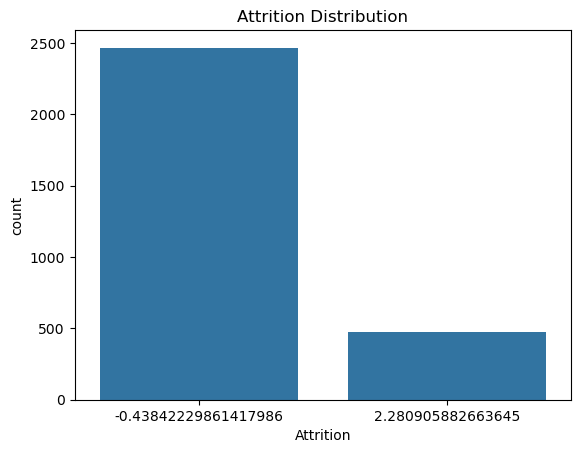

In [ ]:
# Attrition distribution to check attrition rate
sns.countplot(x = 'Attrition', data = data)
plt.title('Attrition Distribution')
plt.show()

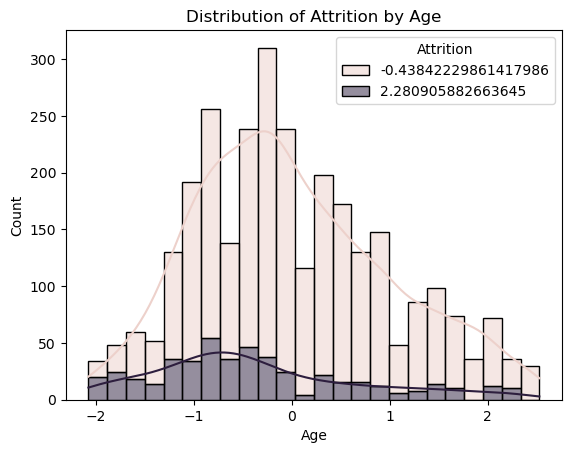

In [ ]:
# Age distribution
sns.histplot(x = 'Age', hue = 'Attrition', data = data, multiple = 'stack',  kde = True)
plt.title('Distribution of Attrition by Age')
plt.show()

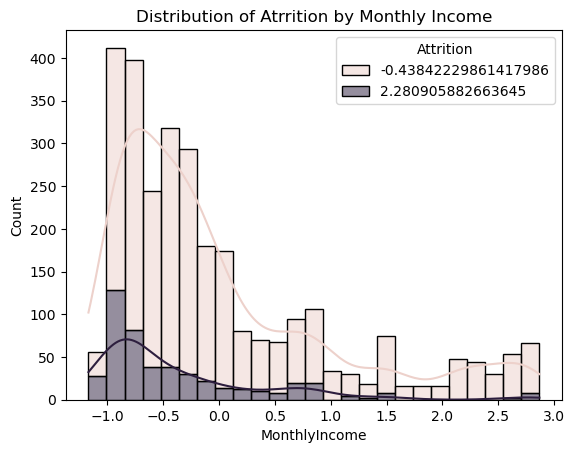

In [ ]:
#Plot the distribution of monthly income by attrition
sns.histplot(x = 'MonthlyIncome', hue = 'Attrition', data = data, multiple = 'stack', kde = True)
plt.title('Distribution of Atrrition by Monthly Income')
plt.show()

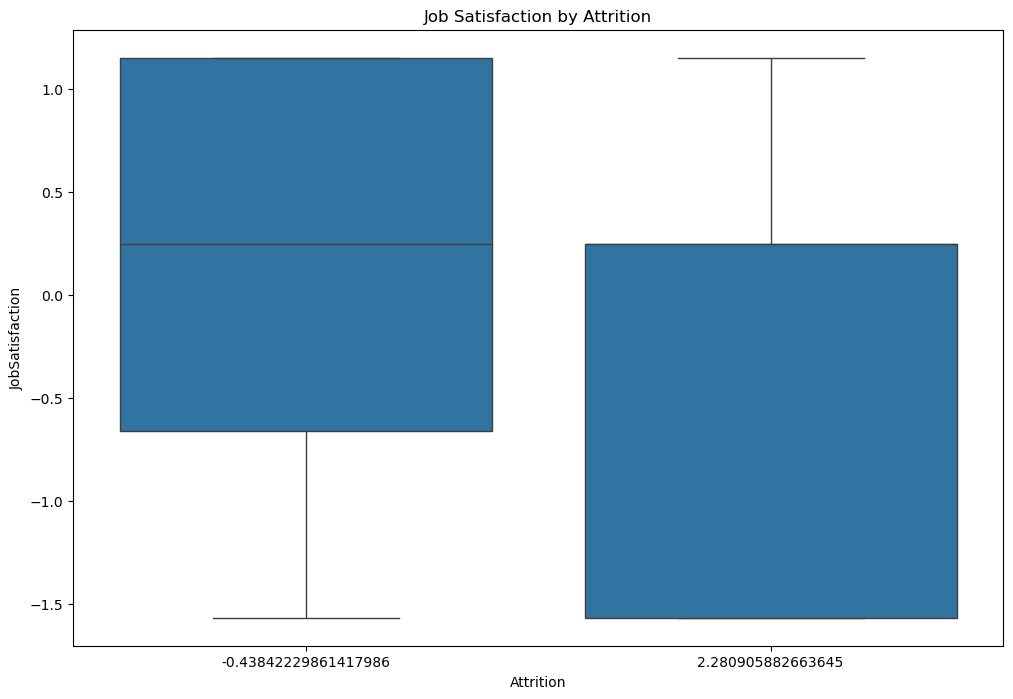

In [ ]:
#Plot the boxplot of JobSatisfaction by attrition
plt.figure(figsize=(12,8))
sns.boxplot(x = 'Attrition', y = 'JobSatisfaction', data = data)
plt.title('Job Satisfaction by Attrition')
plt.show()

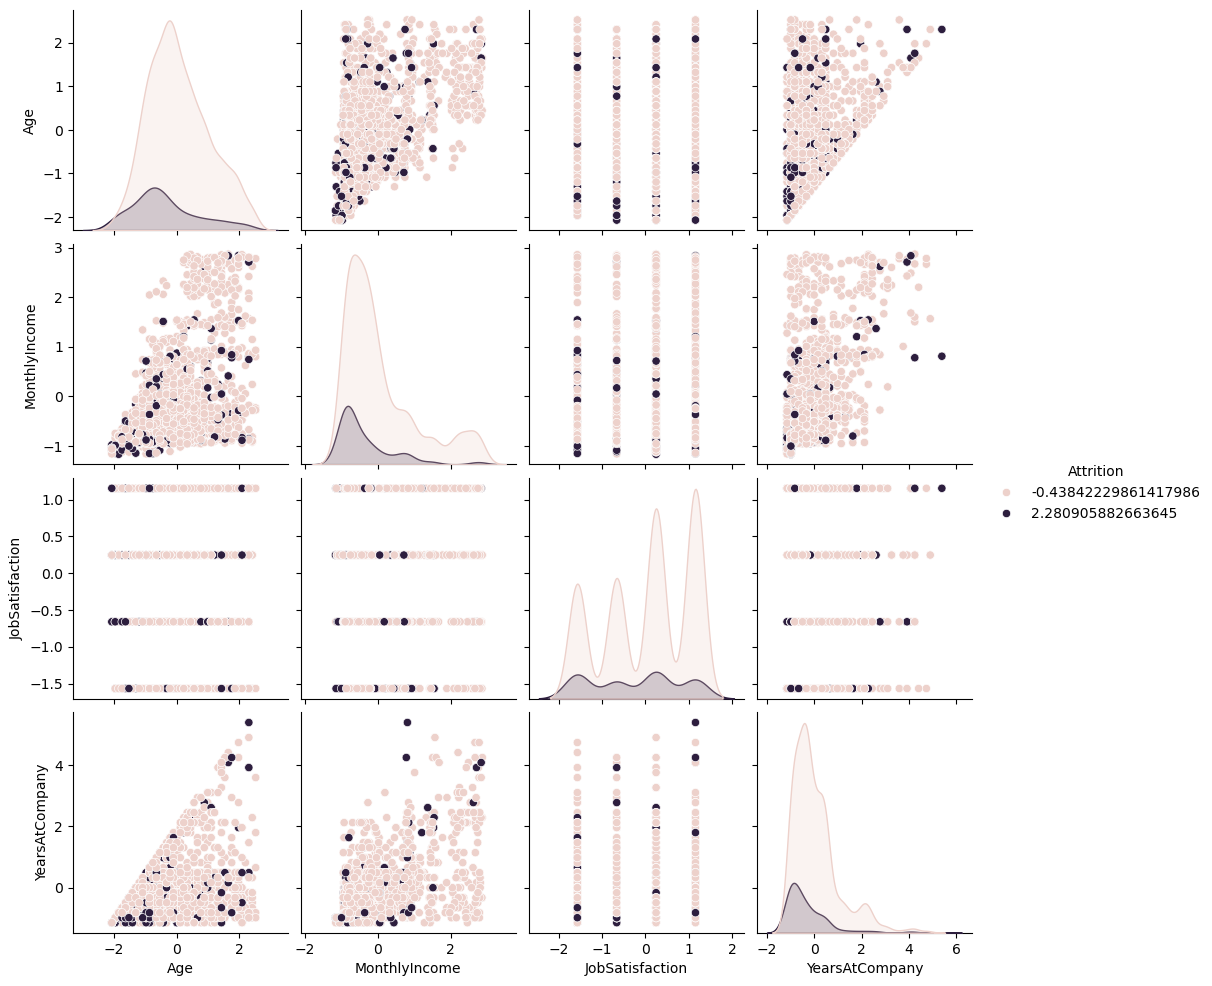

In [ ]:
#Pairplot to see relationship between selected features
selected_features = ['Age', 'MonthlyIncome', 'JobSatisfaction', 'YearsAtCompany', 'Attrition']
sns.pairplot(data[selected_features], hue = 'Attrition')
plt.show()

In [ ]:
#Seperate features and target
x = data.drop('Attrition', axis = 1)
y = data['Attrition']
print(x,y)

      EmployeeNumber       Age  BusinessTravel  DailyRate  Department  \
0          -1.731462  0.446350        0.590048   0.742527    1.401512   
1          -1.730284  1.322365       -0.913194  -1.297775   -0.493817   
2          -1.729105  0.008343        0.590048   1.414363   -0.493817   
3          -1.727927 -0.429664       -0.913194   1.461466   -0.493817   
4          -1.726749 -1.086676        0.590048  -0.524295   -0.493817   
...              ...       ...             ...        ...         ...   
2935        1.726749 -0.101159       -0.913194   0.202082   -0.493817   
2936        1.727927  0.227347        0.590048  -0.469754   -0.493817   
2937        1.729105 -1.086676        0.590048  -1.605183   -0.493817   
2938        1.730284  1.322365       -0.913194   0.546677    1.401512   
2939        1.731462 -0.320163        0.590048  -0.432568   -0.493817   

      DistanceFromHome  Education  EducationField  EmployeeCount  \
0            -1.010909  -0.891688       -0.937414      

Logistic Regression

In [ ]:
data.head()

,EmployeeNumber,Attrition,Age,BusinessTravel,DailyRate,Department,DistanceFromHome,Education,EducationField,EmployeeCount,...,RelationshipSatisfaction,StandardHours,StockOptionLevel,TotalWorkingYears,TrainingTimesLastYear,WorkLifeBalance,YearsAtCompany,YearsInCurrentRole,YearsSinceLastPromotion,YearsWithCurrManager
0,-1.731462,2.280906,0.446350,0.590048,0.742527,1.401512,-1.010909,-0.891688,-0.937414,0.0,...,-1.584178,0.0,-0.932014,-0.421642,-2.171982,-2.493820,-0.164613,-0.063296,-0.679146,0.245834
1,-1.730284,-0.438422,1.322365,-0.913194,-1.297775,-0.493817,-0.147150,-1.868426,-0.937414,0.0,...,1.191438,0.0,0.241988,-0.164511,0.155707,0.338096,0.488508,0.764998,-0.368715,0.806541
2,-1.729105,2.280906,0.008343,0.590048,1.414363,-0.493817,-0.887515,-0.891688,1.316673,0.0,...,-0.658973,0.0,-0.932014,-0.550208,0.155707,0.338096,-1.144294,-1.167687,-0.679146,-1.155935
3,-1.727927,-0.438422,-0.429664,-0.913194,1.461466,-0.493817,-0.764121,1.061787,-0.937414,0.0,...,0.266233,0.0,-0.932014,-0.421642,0.155707,0.338096,0.161947,0.764998,0.252146,-1.155935
4,-1.726749,-0.438422,-1.086676,0.590048,-0.524295,-0.493817,-0.887515,-1.868426,0.565311,0.0,...,1.191438,0.0,0.241988,-0.678774,0.155707,0.338096,-0.817734,-0.615492,-0.058285,-0.595227


In [ ]:
#Encoding the data
for i in data.columns:
    data[i] = le.fit_transform(data[i])

In [ ]:
data.describe()

,EmployeeNumber,Attrition,Age,BusinessTravel,DailyRate,Department,DistanceFromHome,Education,EducationField,EmployeeCount,...,RelationshipSatisfaction,StandardHours,StockOptionLevel,TotalWorkingYears,TrainingTimesLastYear,WorkLifeBalance,YearsAtCompany,YearsInCurrentRole,YearsSinceLastPromotion,YearsWithCurrManager
count,2940.000000,2940.000000,2940.000000,2940.000000,2940.000000,2940.000000,2940.000000,2940.000000,2940.000000,2940.0,...,2940.000000,2940.0,2940.000000,2940.000000,2940.000000,2940.000000,2940.000000,2940.000000,2940.000000,2940.000000
mean,1469.500000,0.161224,18.923810,1.607483,443.074830,1.260544,8.192517,1.912925,2.247619,0.0,...,1.712245,0.0,0.793878,11.278231,2.799320,1.761224,6.991156,4.229252,2.187755,4.123129
std,848.849221,0.367800,9.133819,0.665342,253.470066,0.527703,8.105485,1.023991,1.331143,0.0,...,1.081025,0.0,0.851932,7.774519,1.289051,0.706356,6.051997,3.622521,3.221882,3.567529
min,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.0,...,0.000000,0.0,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,734.750000,0.000000,12.000000,1.000000,225.000000,1.000000,1.000000,1.000000,1.000000,0.0,...,1.000000,0.0,0.000000,6.000000,2.000000,1.000000,3.000000,2.000000,0.000000,2.000000
50%,1469.500000,0.000000,18.000000,2.000000,447.000000,1.000000,6.000000,2.000000,2.000000,0.0,...,2.000000,0.0,1.000000,10.000000,3.000000,2.000000,5.000000,3.000000,1.000000,3.000000
75%,2204.250000,0.000000,25.000000,2.000000,660.000000,2.000000,13.000000,3.000000,3.000000,0.0,...,3.000000,0.0,1.000000,15.000000,3.000000,2.000000,9.000000,7.000000,3.000000,7.000000
max,2939.000000,1.000000,42.000000,2.000000,885.000000,2.000000,28.000000,4.000000,5.000000,0.0,...,3.000000,0.0,3.000000,39.000000,6.000000,3.000000,36.000000,18.000000,15.000000,17.000000


In [ ]:
data_std = scaler.fit_transform(data)
data_std = pd.DataFrame(data_std)
data_std.describe()

,0,1,2,3,4,5,6,7,8,9,...,25,26,27,28,29,30,31,32,33,34
count,2940.000000,2.940000e+03,2.940000e+03,2.940000e+03,2.940000e+03,2.940000e+03,2.940000e+03,2.940000e+03,2.940000e+03,2940.0,...,2.940000e+03,2940.0,2.940000e+03,2.940000e+03,2.940000e+03,2.940000e+03,2.940000e+03,2.940000e+03,2.940000e+03,2.940000e+03
mean,0.000000,9.123465e-17,-3.504377e-17,-5.860769e-17,6.646233e-17,-1.353415e-16,4.591943e-17,7.371277e-17,4.199211e-17,0.0,...,-8.942204e-17,0.0,6.283711e-17,9.908929e-17,8.579683e-17,-7.854639e-18,-8.217161e-17,9.183886e-17,2.416812e-18,-2.688703e-17
std,1.000170,1.000170e+00,1.000170e+00,1.000170e+00,1.000170e+00,1.000170e+00,1.000170e+00,1.000170e+00,1.000170e+00,0.0,...,1.000170e+00,0.0,1.000170e+00,1.000170e+00,1.000170e+00,1.000170e+00,1.000170e+00,1.000170e+00,1.000170e+00,1.000170e+00
min,-1.731462,-4.384223e-01,-2.072192e+00,-2.416437e+00,-1.748333e+00,-2.389147e+00,-1.010909e+00,-1.868426e+00,-1.688776e+00,0.0,...,-1.584178e+00,0.0,-9.320144e-01,-1.450913e+00,-2.171982e+00,-2.493820e+00,-1.155378e+00,-1.167687e+00,-6.791457e-01,-1.155935e+00
25%,-0.865731,-4.384223e-01,-7.581700e-01,-9.131944e-01,-8.605037e-01,-4.938171e-01,-8.875151e-01,-8.916883e-01,-9.374137e-01,0.0,...,-6.589728e-01,0.0,-9.320144e-01,-6.790297e-01,-6.201892e-01,-1.077862e+00,-6.595898e-01,-6.154916e-01,-6.791457e-01,-5.952272e-01
50%,0.000000,-4.384223e-01,-1.011589e-01,5.900483e-01,1.548837e-02,-4.938171e-01,-2.705440e-01,8.504925e-02,-1.860516e-01,0.0,...,2.662326e-01,0.0,2.419883e-01,-1.644409e-01,1.557071e-01,3.380962e-01,-3.290641e-01,-3.393937e-01,-3.687153e-01,-3.148735e-01
75%,0.865731,-4.384223e-01,6.653541e-01,5.900483e-01,8.559672e-01,1.401512e+00,5.932157e-01,1.061787e+00,5.653105e-01,0.0,...,1.191438e+00,0.0,2.419883e-01,4.787951e-01,1.557071e-01,3.380962e-01,3.319872e-01,7.649976e-01,2.521455e-01,8.065415e-01
max,1.731462,2.280906e+00,2.526886e+00,5.900483e-01,1.743797e+00,1.401512e+00,2.444129e+00,2.038524e+00,2.068035e+00,0.0,...,1.191438e+00,0.0,2.589994e+00,3.566328e+00,2.483396e+00,1.754054e+00,4.794084e+00,3.802074e+00,3.977310e+00,3.610079e+00


In [ ]:
x = data.iloc[:, :1].join(data.iloc[:, 2:])
y = data.iloc[:, 1]

In [ ]:
X_train, X_test , y_train, y_test = train_test_split(x,y, test_size = 0.2, random_state = 0)
print(data.shape, X_train.shape, X_test.shape, y_train.shape, y_test.shape)

(2940, 35) (2352, 34) (588, 34) (2352,) (588,)


In [ ]:
#Standard Scaler
X_train = scaler.fit_transform(X_train)
X_test = scaler.fit_transform(X_test)

In [ ]:
#Applying Logistic Regression
classifier = LogisticRegression()
classifier.fit(X_train, y_train)

LogisticRegression()

In [ ]:
#Making prediction for y test
y_pred = classifier.predict(X_test)
print(y_pred, y_test)

[0 1 0 0 0 0 0 0 0 0 0 1 0 0 0 0 0 0 0 0 0 0 0 0 1 0 0 0 0 0 0 0 0 0 0 0 0
 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 1 0 0 0 0 0 0 0 0 0 0 0 0 0 1 0 0 0 0 0 0 0
 0 0 0 1 0 1 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 1 0 0 0 0 0 0 0 0 1 0
 0 0 0 1 0 0 0 1 1 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0
 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 1 0 0 0 0 0 0 0 0 0 0 0 1 0 0 0
 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 1 0 0 0 0 1 0 0 0 0 0 0 0 0 0 0 0 1 0 0 0 0
 0 0 0 0 0 0 0 0 0 1 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 1 1 1
 0 0 0 0 0 0 0 0 0 1 0 0 0 1 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0
 1 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 1 0 0 0 0 0 0 0 0 0 0 0 1 0 1 0 0
 0 0 0 0 0 1 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0
 0 0 0 0 0 0 0 0 1 0 0 0 0 0 0 0 0 0 0 0 0 0 1 0 0 0 0 0 0 0 0 0 0 0 0 0 0
 0 0 0 0 0 0 0 0 0 1 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 1 0 0 0 0 0 0
 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 1 0 0 0 0 0 0 0 0 0 0 0
 0 0 0 0 0 1 0 1 0 0 0 0 

In [ ]:
pred_comp_test = pd.DataFrame({'Actual': y_test, 'Predicted': y_pred})
pred_comp_test

,Actual,Predicted
704,0,0
2482,1,1
410,0,0
2608,0,0
2594,0,0
...,...,...
1555,0,0
2823,1,1
675,0,0
2485,0,0


In [ ]:
#Making confusion matrix for test data
cm = confusion_matrix(y_test, y_pred)
print('Confusion Matrix: \n', cm)

Confusion Matrix: 
 [[480   8]
 [ 62  38]]


In [ ]:
(481+38) / (481+7+62+38)

0.8826530612244898

In [ ]:
print('accurance: ', accuracy_score(y_test,y_pred))

accurance:  0.8809523809523809


In [ ]:
cm_class_test = classification_report(y_test, y_pred)
print(cm_class_test)

              precision    recall  f1-score   support

           0       0.89      0.98      0.93       488
           1       0.83      0.38      0.52       100

    accuracy                           0.88       588
   macro avg       0.86      0.68      0.73       588
weighted avg       0.88      0.88      0.86       588



In [ ]:
y_pred_train = classifier.predict(X_train)
y_pred_train

array([0, 0, 0, ..., 0, 1, 1], dtype=int64)

In [ ]:
#Making confusion matrix for train data
cm_train = confusion_matrix(y_pred_train, y_train)
print('Confusion Matrix: \n' , cm_train)

Confusion Matrix: 
 [[1923  237]
 [  55  137]]


In [ ]:
(1923 + 137) / (1923 + 237 + 55 + 137)

0.8758503401360545

In [ ]:
print('accurance: ', accuracy_score(y_pred_train, y_train))

accurance:  0.8758503401360545


In [ ]:
cm_class_train = classification_report(y_pred_train, y_train)
print(cm_class_train)

              precision    recall  f1-score   support

           0       0.97      0.89      0.93      2160
           1       0.37      0.71      0.48       192

    accuracy                           0.88      2352
   macro avg       0.67      0.80      0.71      2352
weighted avg       0.92      0.88      0.89      2352



In [ ]:
fpr,tpr,_ = metrics.roc_curve(y_test,y_pred)

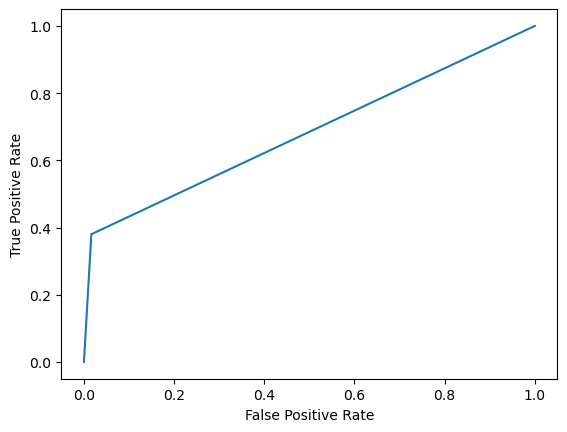

In [ ]:
plt.plot(fpr,tpr)
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.show()

KNN

In [ ]:
#Normalization function
def norm_func(i):
    x = (i-i.min())/(i.max()-i.min())
    return(x)

In [ ]:
data.describe()

,EmployeeNumber,Attrition,Age,BusinessTravel,DailyRate,Department,DistanceFromHome,Education,EducationField,EmployeeCount,...,RelationshipSatisfaction,StandardHours,StockOptionLevel,TotalWorkingYears,TrainingTimesLastYear,WorkLifeBalance,YearsAtCompany,YearsInCurrentRole,YearsSinceLastPromotion,YearsWithCurrManager
count,2940.000000,2940.000000,2940.000000,2940.000000,2940.000000,2940.000000,2940.000000,2940.000000,2940.000000,2940.0,...,2940.000000,2940.0,2940.000000,2940.000000,2940.000000,2940.000000,2940.000000,2940.000000,2940.000000,2940.000000
mean,1469.500000,0.161224,18.923810,1.607483,443.074830,1.260544,8.192517,1.912925,2.247619,0.0,...,1.712245,0.0,0.793878,11.278231,2.799320,1.761224,6.991156,4.229252,2.187755,4.123129
std,848.849221,0.367800,9.133819,0.665342,253.470066,0.527703,8.105485,1.023991,1.331143,0.0,...,1.081025,0.0,0.851932,7.774519,1.289051,0.706356,6.051997,3.622521,3.221882,3.567529
min,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.0,...,0.000000,0.0,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,734.750000,0.000000,12.000000,1.000000,225.000000,1.000000,1.000000,1.000000,1.000000,0.0,...,1.000000,0.0,0.000000,6.000000,2.000000,1.000000,3.000000,2.000000,0.000000,2.000000
50%,1469.500000,0.000000,18.000000,2.000000,447.000000,1.000000,6.000000,2.000000,2.000000,0.0,...,2.000000,0.0,1.000000,10.000000,3.000000,2.000000,5.000000,3.000000,1.000000,3.000000
75%,2204.250000,0.000000,25.000000,2.000000,660.000000,2.000000,13.000000,3.000000,3.000000,0.0,...,3.000000,0.0,1.000000,15.000000,3.000000,2.000000,9.000000,7.000000,3.000000,7.000000
max,2939.000000,1.000000,42.000000,2.000000,885.000000,2.000000,28.000000,4.000000,5.000000,0.0,...,3.000000,0.0,3.000000,39.000000,6.000000,3.000000,36.000000,18.000000,15.000000,17.000000


In [ ]:
data.head()

,EmployeeNumber,Attrition,Age,BusinessTravel,DailyRate,Department,DistanceFromHome,Education,EducationField,EmployeeCount,...,RelationshipSatisfaction,StandardHours,StockOptionLevel,TotalWorkingYears,TrainingTimesLastYear,WorkLifeBalance,YearsAtCompany,YearsInCurrentRole,YearsSinceLastPromotion,YearsWithCurrManager
0,0,1,23,2,624,2,0,1,1,0,...,0,0,0,8,0,0,6,4,0,5
1,1,0,31,1,113,1,7,0,1,0,...,3,0,1,10,3,2,10,7,1,7
2,2,1,19,2,805,1,1,1,4,0,...,1,0,0,7,3,2,0,0,0,0
3,3,0,15,1,820,1,2,3,1,0,...,2,0,0,8,3,2,8,7,3,0
4,4,0,9,2,312,1,1,0,3,0,...,3,0,1,6,3,2,2,2,2,2


In [ ]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2940 entries, 0 to 2939
Data columns (total 35 columns):
 #   Column                    Non-Null Count  Dtype
---  ------                    --------------  -----
 0   EmployeeNumber            2940 non-null   int64
 1   Attrition                 2940 non-null   int64
 2   Age                       2940 non-null   int64
 3   BusinessTravel            2940 non-null   int64
 4   DailyRate                 2940 non-null   int64
 5   Department                2940 non-null   int64
 6   DistanceFromHome          2940 non-null   int64
 7   Education                 2940 non-null   int64
 8   EducationField            2940 non-null   int64
 9   EmployeeCount             2940 non-null   int64
 10  EnvironmentSatisfaction   2940 non-null   int64
 11  Gender                    2940 non-null   int64
 12  HourlyRate                2940 non-null   int64
 13  JobInvolvement            2940 non-null   int64
 14  JobLevel                  2940 non-null 

In [ ]:
data.isna().sum()

EmployeeNumber              0
Attrition                   0
Age                         0
BusinessTravel              0
DailyRate                   0
Department                  0
DistanceFromHome            0
Education                   0
EducationField              0
EmployeeCount               0
EnvironmentSatisfaction     0
Gender                      0
HourlyRate                  0
JobInvolvement              0
JobLevel                    0
JobRole                     0
JobSatisfaction             0
MaritalStatus               0
MonthlyIncome               0
MonthlyRate                 0
NumCompaniesWorked          0
Over18                      0
OverTime                    0
PercentSalaryHike           0
PerformanceRating           0
RelationshipSatisfaction    0
StandardHours               0
StockOptionLevel            0
TotalWorkingYears           0
TrainingTimesLastYear       0
WorkLifeBalance             0
YearsAtCompany              0
YearsInCurrentRole          0
YearsSince

In [ ]:
X = np.array(data.iloc[:,:]) # Predictors
Y = np.array(data['Attrition']) # Target

In [ ]:
X.shape

(2940, 35)

In [ ]:
Y.shape

(2940,)

In [ ]:
X_train, X_test, Y_train, Y_test = train_test_split(X,y, test_size = 0.2)

In [ ]:
knn = KNeighborsClassifier(n_neighbors = 7)
knn.fit(X_train, Y_train)

pred = knn.predict(X_test)
pred

array([0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 1, 0, 0, 0, 1, 0, 0, 1, 0, 0, 0, 0, 0, 0,

In [ ]:
print(accuracy_score(Y_test, pred))
pd.crosstab(Y_test, pred, rownames = ['Actual'], colnames = ['Predictors'])

0.8231292517006803


Predictors,0,1
Actual,,
0,479,16
1,88,5


In [ ]:
#Error on train data
pred_train = knn.predict(X_train)
print(accuracy_score(Y_train, pred_train))
pd.crosstab(Y_train, pred_train, rownames = ['Actual'], colnames = ['Predictors'])

0.8460884353741497


Predictors,0,1
Actual,,
0,1943,28
1,334,47


In [ ]:
#Creating empty list variable
acc = []

#running KNN algorithm for 3 to 5 nearest neighbors(odd numbers) and storing the accuracy values
for i in range(3,50,2):
    neigh = KNeighborsClassifier(n_neighbors = i)
    neigh.fit(X_train, Y_train)
    train_acc = np.mean(neigh.predict(X_train) == Y_train)
    test_acc = np.mean(neigh.predict(X_test) == Y_test)
    Difference = train_acc - test_acc
    acc.append([i, train_acc, test_acc, Difference])

In [ ]:
data_knn = pd.DataFrame(acc)
data_knn.columns = 'K', 'train_acc', 'test_acc', 'difference'
data_knn

,K,train_acc,test_acc,difference
0,3,0.881378,0.784014,0.097364
1,5,0.853741,0.809524,0.044218
2,7,0.846088,0.823129,0.022959
3,9,0.844388,0.823129,0.021259
4,11,0.844813,0.833333,0.011480
5,13,0.842687,0.835034,0.007653
6,15,0.840986,0.835034,0.005952
7,17,0.838010,0.836735,0.001276
8,19,0.839286,0.836735,0.002551
9,21,0.838861,0.836735,0.002126


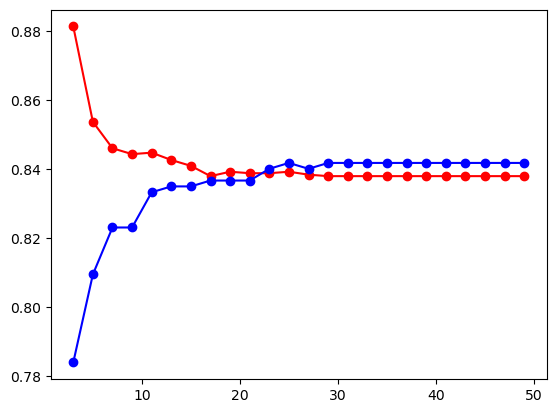

In [ ]:
#Train accuracy plot
plt.plot(np.arange(3,50,2),[i[1] for i in acc], "ro-")

#Test accuracy plot
plt.plot(np.arange(3,50,2), [i[2] for i in acc], "bo-")

Support Vector Machine

In [ ]:
train , test = train_test_split(data, test_size = 0.2)

In [ ]:
print(data.shape)
print(train.shape)
print(test.shape)

(2940, 35)
(2352, 35)
(588, 35)


In [ ]:
#Checking the structure of test data
test.info()

<class 'pandas.core.frame.DataFrame'>
Index: 588 entries, 1058 to 1158
Data columns (total 35 columns):
 #   Column                    Non-Null Count  Dtype
---  ------                    --------------  -----
 0   EmployeeNumber            588 non-null    int64
 1   Attrition                 588 non-null    int64
 2   Age                       588 non-null    int64
 3   BusinessTravel            588 non-null    int64
 4   DailyRate                 588 non-null    int64
 5   Department                588 non-null    int64
 6   DistanceFromHome          588 non-null    int64
 7   Education                 588 non-null    int64
 8   EducationField            588 non-null    int64
 9   EmployeeCount             588 non-null    int64
 10  EnvironmentSatisfaction   588 non-null    int64
 11  Gender                    588 non-null    int64
 12  HourlyRate                588 non-null    int64
 13  JobInvolvement            588 non-null    int64
 14  JobLevel                  588 non-null    i

In [ ]:
train_X = train.iloc[:, :1].join(data.iloc[:, 2:])
train_y = train.iloc[:, 1]
test_X = test.iloc[:, :1].join(data.iloc[:, 2:])
test_y = test.iloc[:, 1]

In [ ]:
train_X

,EmployeeNumber,Age,BusinessTravel,DailyRate,Department,DistanceFromHome,Education,EducationField,EmployeeCount,EnvironmentSatisfaction,...,RelationshipSatisfaction,StandardHours,StockOptionLevel,TotalWorkingYears,TrainingTimesLastYear,WorkLifeBalance,YearsAtCompany,YearsInCurrentRole,YearsSinceLastPromotion,YearsWithCurrManager
2756,2756,22,2,328,1,1,1,1,0,2,...,3,0,1,7,5,1,4,3,0,2
1441,1441,38,0,366,1,0,3,1,0,2,...,0,0,1,13,2,1,13,12,1,9
1234,1234,29,0,277,2,1,3,2,0,2,...,3,0,1,4,3,0,1,0,0,0
1608,1608,7,2,542,2,27,2,1,0,0,...,3,0,0,6,3,2,2,2,2,2
130,130,25,1,541,1,27,2,3,0,1,...,3,0,0,18,2,2,3,2,1,2
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
23,23,3,2,181,1,14,1,1,0,2,...,3,0,0,0,6,2,0,0,0,0
138,138,7,2,542,2,27,2,1,0,0,...,3,0,0,6,3,2,2,2,2,2
723,723,28,2,293,1,6,1,3,0,3,...,1,0,1,13,3,2,8,7,0,7
1496,1496,14,1,639,1,15,0,1,0,1,...,1,0,0,10,5,2,10,2,6,7


In [ ]:
train_y

2756    0
1441    0
1234    0
1608    0
130     0
       ..
23      0
138     0
723     0
1496    1
545     0
Name: Attrition, Length: 2352, dtype: int64

In [ ]:
test_X

,EmployeeNumber,Age,BusinessTravel,DailyRate,Department,DistanceFromHome,Education,EducationField,EmployeeCount,EnvironmentSatisfaction,...,RelationshipSatisfaction,StandardHours,StockOptionLevel,TotalWorkingYears,TrainingTimesLastYear,WorkLifeBalance,YearsAtCompany,YearsInCurrentRole,YearsSinceLastPromotion,YearsWithCurrManager
1058,1058,16,2,438,2,23,3,3,0,0,...,2,0,0,16,2,3,15,9,10,10
729,729,17,2,304,1,24,3,3,0,2,...,2,0,1,16,3,1,16,10,10,1
2692,2692,6,2,90,0,21,0,0,0,3,...,2,0,1,1,2,2,1,0,0,0
367,367,32,2,591,1,9,2,5,0,3,...,3,0,0,20,2,2,4,3,1,3
912,912,8,2,304,1,3,1,1,0,2,...,1,0,0,8,2,1,8,5,2,2
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2454,2454,10,2,411,2,25,2,1,0,2,...,2,0,1,5,0,2,5,3,0,4
2379,2379,1,2,106,1,24,2,1,0,1,...,3,0,0,1,2,2,1,0,0,1
1596,1596,40,2,33,1,22,3,3,0,3,...,3,0,1,39,3,1,36,10,15,6
2333,2333,15,2,33,0,1,2,0,0,1,...,3,0,1,5,2,2,5,4,1,4


In [ ]:
test_y

1058    1
729     0
2692    1
367     0
912     0
       ..
2454    0
2379    0
1596    1
2333    0
1158    0
Name: Attrition, Length: 588, dtype: int64

In [ ]:
#Kernel = rbf
model_rbf =  SVC(kernel = "rbf")
model_rbf.fit(train_X, train_y)
pred_test_rbf = model_rbf.predict(test_X)
res_rbf = np.mean(pred_test_rbf == test_y)
res_rbf

0.8435374149659864

In [ ]:
#Kernel = polynomial
model_poly = SVC(kernel = "poly")
model_poly.fit(train_X, train_y)
model_test_poly = model_poly.predict(test_X)
res_poly = np.mean(model_test_poly == test_y)
res_poly

0.8435374149659864

In [ ]:
#Kernel = Sigmoid
model_sigmoid = SVC(kernel = "sigmoid")
model_sigmoid.fit(train_X, train_y)
model_test_sigmoid = model_sigmoid.predict(test_X)
res_sigmoid = np.mean(model_test_sigmoid == test_y)
res_sigmoid

0.7482993197278912

In [ ]:
#Creating a dataframe for the above kernels
pd.DataFrame({'Model' : ['Rbf' , 'Polynomial', 'Sigmoid'], 'Accuracy' : [res_rbf, res_poly, res_sigmoid]})

,Model,Accuracy
0,Rbf,0.843537
1,Polynomial,0.843537
2,Sigmoid,0.748299


Decision Tree

In [ ]:
#Extracting Independent and Dependent Variables
X = data.iloc[:, 2:].values
y = data.iloc[:, 1].values

In [ ]:
data.describe()

,EmployeeNumber,Attrition,Age,BusinessTravel,DailyRate,Department,DistanceFromHome,Education,EducationField,EmployeeCount,...,RelationshipSatisfaction,StandardHours,StockOptionLevel,TotalWorkingYears,TrainingTimesLastYear,WorkLifeBalance,YearsAtCompany,YearsInCurrentRole,YearsSinceLastPromotion,YearsWithCurrManager
count,2940.000000,2940.000000,2940.000000,2940.000000,2940.000000,2940.000000,2940.000000,2940.000000,2940.000000,2940.0,...,2940.000000,2940.0,2940.000000,2940.000000,2940.000000,2940.000000,2940.000000,2940.000000,2940.000000,2940.000000
mean,1469.500000,0.161224,18.923810,1.607483,443.074830,1.260544,8.192517,1.912925,2.247619,0.0,...,1.712245,0.0,0.793878,11.278231,2.799320,1.761224,6.991156,4.229252,2.187755,4.123129
std,848.849221,0.367800,9.133819,0.665342,253.470066,0.527703,8.105485,1.023991,1.331143,0.0,...,1.081025,0.0,0.851932,7.774519,1.289051,0.706356,6.051997,3.622521,3.221882,3.567529
min,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.0,...,0.000000,0.0,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,734.750000,0.000000,12.000000,1.000000,225.000000,1.000000,1.000000,1.000000,1.000000,0.0,...,1.000000,0.0,0.000000,6.000000,2.000000,1.000000,3.000000,2.000000,0.000000,2.000000
50%,1469.500000,0.000000,18.000000,2.000000,447.000000,1.000000,6.000000,2.000000,2.000000,0.0,...,2.000000,0.0,1.000000,10.000000,3.000000,2.000000,5.000000,3.000000,1.000000,3.000000
75%,2204.250000,0.000000,25.000000,2.000000,660.000000,2.000000,13.000000,3.000000,3.000000,0.0,...,3.000000,0.0,1.000000,15.000000,3.000000,2.000000,9.000000,7.000000,3.000000,7.000000
max,2939.000000,1.000000,42.000000,2.000000,885.000000,2.000000,28.000000,4.000000,5.000000,0.0,...,3.000000,0.0,3.000000,39.000000,6.000000,3.000000,36.000000,18.000000,15.000000,17.000000


In [ ]:
X_train, X_test, y_train, y_test = train_test_split(x, y, test_size = 0.25, random_state = 0)
print(data.shape, X_train.shape, X_test.shape, y_train.shape, y_test.shape)

(2940, 35) (2205, 34) (735, 34) (2205,) (735,)


In [ ]:
X_train = scaler.fit_transform(X_train)
X_test = scaler.fit_transform(X_test)

In [ ]:
classifier = DecisionTreeClassifier(criterion = 'entropy')
print(classifier.fit(X_train, y_train))

DecisionTreeClassifier(criterion='entropy')


In [ ]:
#Predicting the test set result
y_pred = classifier.predict(X_test)
print(y_test,y_pred)

[0 1 0 0 0 0 0 1 0 0 0 1 0 0 0 0 0 0 0 0 0 0 0 0 1 0 0 0 0 0 0 0 0 0 0 0 0
 0 0 1 0 0 0 0 0 0 0 0 0 0 0 1 0 0 0 0 0 0 0 0 0 0 0 0 0 1 1 0 0 0 0 0 0 0
 0 1 0 1 0 1 0 0 1 0 0 1 0 0 0 0 0 1 0 0 0 0 0 0 0 0 1 0 0 0 0 0 1 0 0 0 1
 0 0 0 1 0 0 0 1 1 0 0 0 0 0 0 0 0 0 1 0 1 0 0 0 0 0 1 0 0 0 0 0 0 0 0 0 0
 0 0 0 0 0 0 0 0 0 0 1 0 0 0 0 0 0 0 0 0 0 1 0 1 0 1 0 1 0 0 0 0 0 1 0 0 0
 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 1 0 0 0 0 0 0 1 0 1 1 1 0 0 0 0 0
 1 0 0 0 0 0 0 0 0 1 0 0 0 0 1 0 0 0 0 1 0 0 0 0 0 1 0 0 0 0 0 0 0 0 1 1 1
 0 0 0 0 0 0 0 0 0 0 0 0 0 1 0 0 0 0 0 0 0 0 1 1 0 0 0 0 0 1 0 0 0 1 0 0 0
 1 0 0 0 0 0 1 0 0 0 0 0 0 0 0 0 0 0 1 0 1 0 0 0 1 0 0 0 0 0 0 0 0 0 1 0 0
 0 0 1 0 0 1 0 0 0 1 0 0 0 0 0 1 0 0 0 0 0 1 0 0 0 1 0 0 1 0 0 0 0 0 0 0 0
 0 0 0 0 0 0 1 0 1 0 0 0 0 0 0 0 0 0 1 1 0 0 0 0 0 0 0 0 1 0 0 0 0 0 1 0 0
 0 0 0 1 0 0 0 0 0 1 0 0 0 0 0 0 1 0 0 0 0 0 0 0 0 0 0 1 0 0 1 0 1 0 0 0 1
 0 0 1 0 0 0 0 1 1 0 1 0 0 0 0 0 0 0 0 0 0 0 0 0 0 1 0 0 0 1 0 0 0 0 0 0 0
 0 0 0 0 0 1 0 1 0 0 0 0 

In [ ]:
#Predicting the train set result
y_pred_train = classifier.predict(X_train)
print(y_train,y_pred_train)

[1 0 1 ... 0 0 1] [1 0 1 ... 0 0 1]


In [ ]:
#Creating the confusion matrix for test data
cm = confusion_matrix(y_test,y_pred)
cm

array([[576,  34],
       [ 25, 100]], dtype=int64)

In [ ]:
(573+100) / (573 + 37 + 25 + 100)

0.9156462585034013

In [ ]:
print('accurance : ',  accuracy_score(y_test, y_pred))

accurance :  0.9197278911564626


In [ ]:
#Creating the confusion matrix for train data
cm_train = confusion_matrix(y_train, y_pred_train)
cm_train

array([[1856,    0],
       [   0,  349]], dtype=int64)

In [ ]:
print('accurance : ',  accuracy_score(y_train, y_pred_train))

accurance :  1.0


In [ ]:
X_train.shape, X_test.shape, y_train.shape, y_test.shape

((2205, 34), (735, 34), (2205,), (735,))

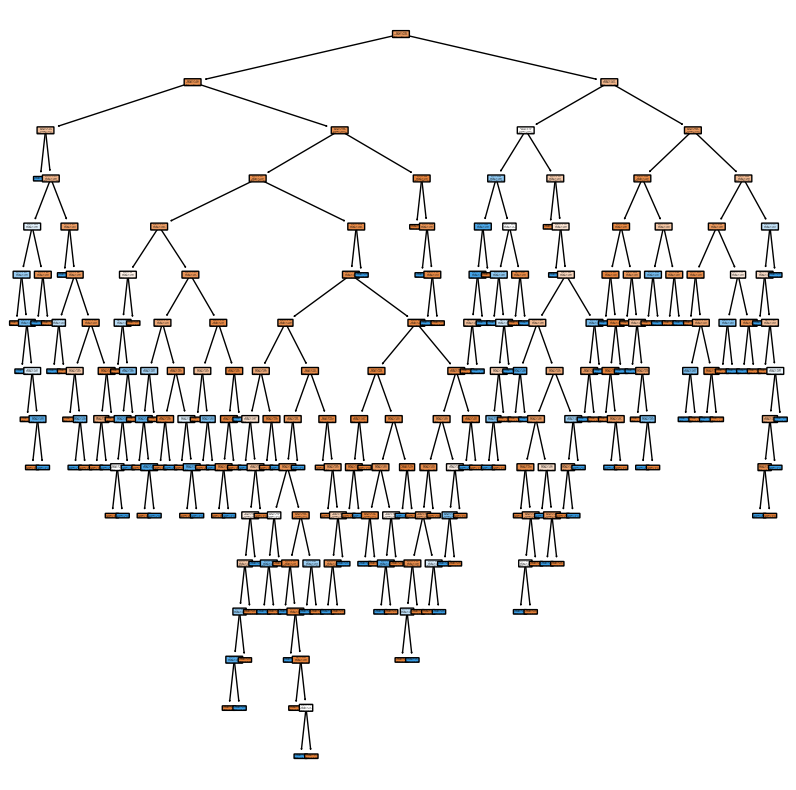

In [ ]:
plt.figure(figsize = (10,10))
tree.plot_tree(classifier, rounded = True, filled = True, proportion = True)
plt.show()

Pre - Pruning

In [ ]:
data.head()

,EmployeeNumber,Attrition,Age,BusinessTravel,DailyRate,Department,DistanceFromHome,Education,EducationField,EmployeeCount,...,RelationshipSatisfaction,StandardHours,StockOptionLevel,TotalWorkingYears,TrainingTimesLastYear,WorkLifeBalance,YearsAtCompany,YearsInCurrentRole,YearsSinceLastPromotion,YearsWithCurrManager
0,0,1,23,2,624,2,0,1,1,0,...,0,0,0,8,0,0,6,4,0,5
1,1,0,31,1,113,1,7,0,1,0,...,3,0,1,10,3,2,10,7,1,7
2,2,1,19,2,805,1,1,1,4,0,...,1,0,0,7,3,2,0,0,0,0
3,3,0,15,1,820,1,2,3,1,0,...,2,0,0,8,3,2,8,7,3,0
4,4,0,9,2,312,1,1,0,3,0,...,3,0,1,6,3,2,2,2,2,2


In [ ]:
#Input and output splits
predictors = data.loc[:, data.columns!="Attrition"]
type(predictors)

target = data["Attrition"]
type(target)

pandas.core.series.Series

In [ ]:
X_train, X_test, y_train, y_test = train_test_split(predictors, target, test_size = 0.2, random_state = 0)

In [ ]:
regtree = tree.DecisionTreeRegressor(max_depth = 3)
regtree.fit(X_train, y_train)

DecisionTreeRegressor(max_depth=3)

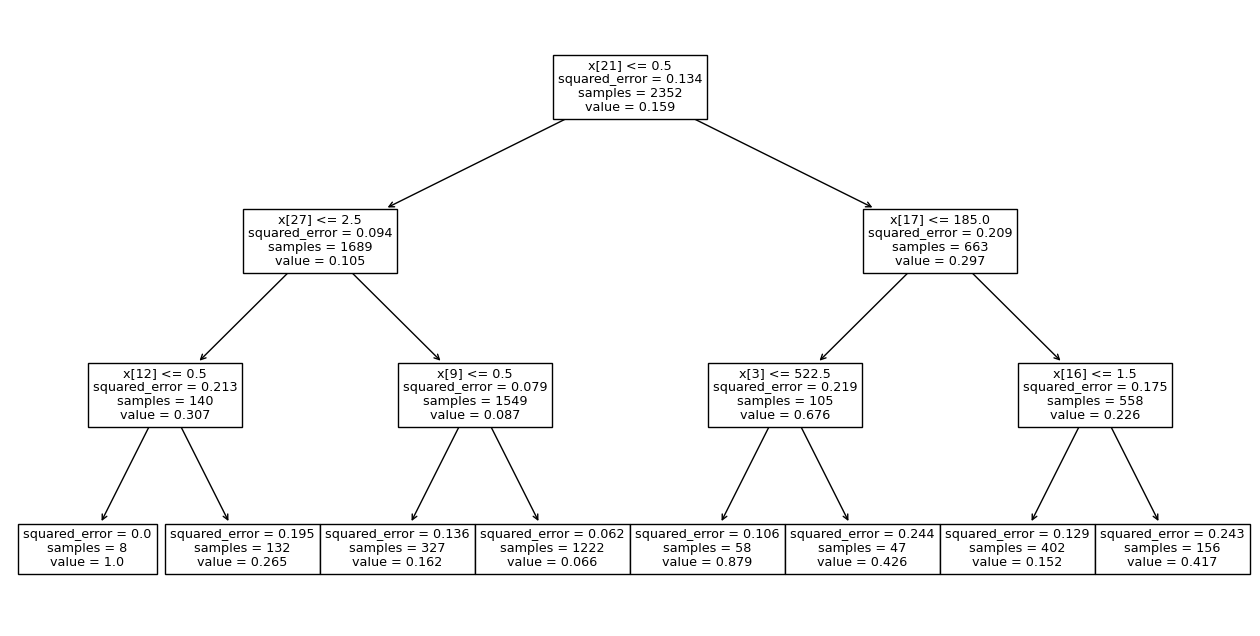

In [ ]:
plt.figure(figsize=(16,8))
tree.plot_tree(regtree)
plt.show()